<a href="https://colab.research.google.com/github/technicalexx/facial_feature_analysis/blob/main/EigenFacesProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decomposition of People's Faces into Principal Components**

#### **Author:** Alexandra Rozin

#### **Description:**

This project involves processing and analyzing a dataset containing images of 38 individuals under various lighting conditions. Each image, sized 192x168 pixels, is converted into a vector and stored in a matrix, alongside a vector indicating the number of images per individual. The study focuses on extracting 'eigenfaces' by subtracting the average face from each image, performing Singular Value Decomposition (SVD) on the result, and reshaping the eigenvectors back into images. Additionally, the project examines the decomposition of an image from an unseen individual using these eigenfaces, exploring the reconstruction accuracy with different numbers of components, and quantifies the contribution of specific eigenfaces to the images of another individual, providing insights into the facial characteristics captured by the eigenfaces.

# <font color="green"><b>Part 1</b></font>

#### Importing All the Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import linalg

#### Getting the Data from the File "allFaces.mat"

In [2]:
provided_file = loadmat("/content/allFaces.mat", matlab_compatible=True, variable_names = None)

In [3]:
sorted(provided_file.keys())

['__globals__',
 '__header__',
 '__version__',
 'faces',
 'm',
 'n',
 'nfaces',
 'person',
 'sub']

In [4]:
# Extracting our variables from the .mat file

provided_faces = provided_file['faces']
m_size = provided_file['m']
n_size = provided_file['n']
vectors_per_face = provided_file['nfaces']
person_info = provided_file['person']
sub_info = provided_file['sub']

In [5]:
# Checking the amount of columns we were provided per each person

vectors_per_face

array([[64., 62., 64., 64., 62., 64., 64., 64., 64., 64., 60., 59., 60.,
        63., 62., 63., 63., 64., 64., 64., 64., 64., 64., 64., 64., 64.,
        64., 64., 64., 64., 64., 64., 64., 64., 64., 64., 64., 64.]])

In [6]:
provided_faces.shape

(32256, 2410)

In [7]:
n_size

array([[192.]])

In [8]:
m_size

array([[168.]])

In [9]:
person_info

array([[38.]])

#### Plotting the first 36 people's faces (1 face per person)

In [10]:
n = 192
m = 168

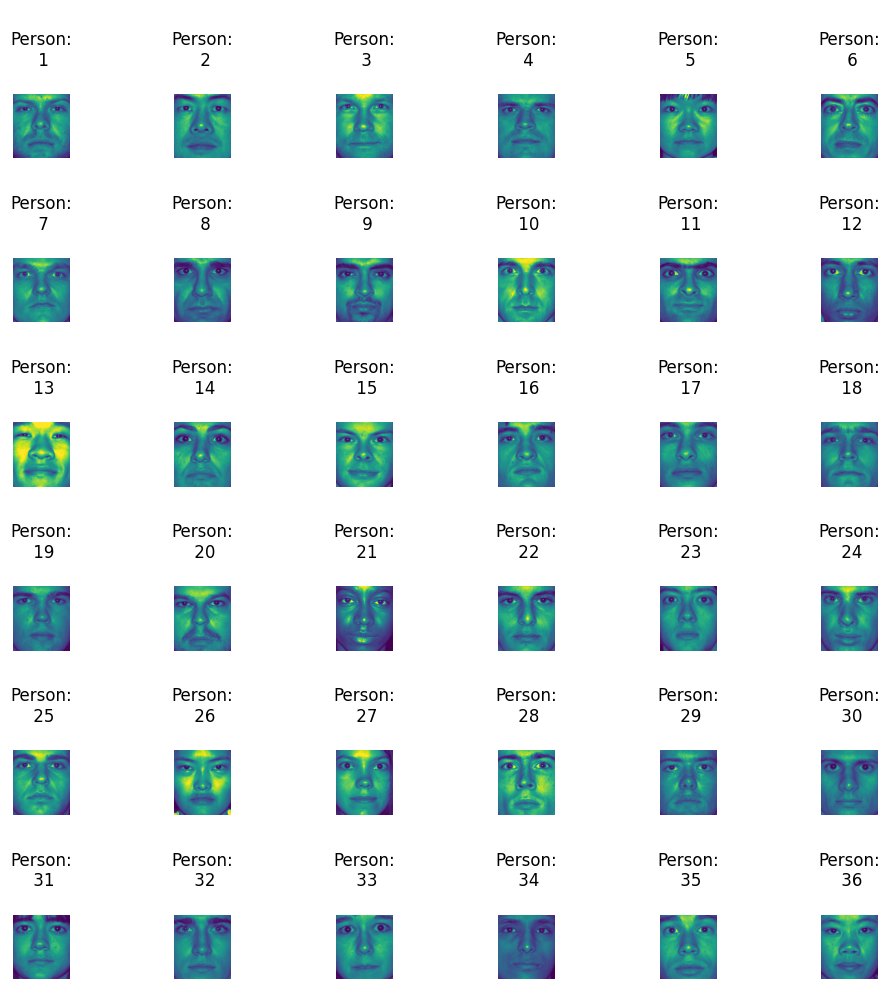

In [11]:
# Creating an array containing indexes of each new person image in our matrix
new_person = [0, 64, 126, 190, 254, 316, 380, 444, 508, 572, 636, 696, 755, 815, 878,
           940, 1003, 1066, 1130, 1194, 1258, 1322, 1386, 1450, 1514, 1578,
           1642, 1706, 1770, 1834, 1898, 1962, 2026, 2090, 2154, 2218]

plt.figure(figsize=(10,10))

for im in range(36):
  face_image = provided_faces[:,new_person[im]]
  face_image_reshaped = face_image.reshape(m,n) #flipped face
  face = np.transpose(face_image_reshaped)

  plt.subplot(6, 6, im+1)
  plt.title(f"\nPerson:\n {im+1}\n")
  plt.imshow(face)
  plt.axis('off')
plt.tight_layout()
plt.show()

#### Displaying the Same 36 People in Greys now:

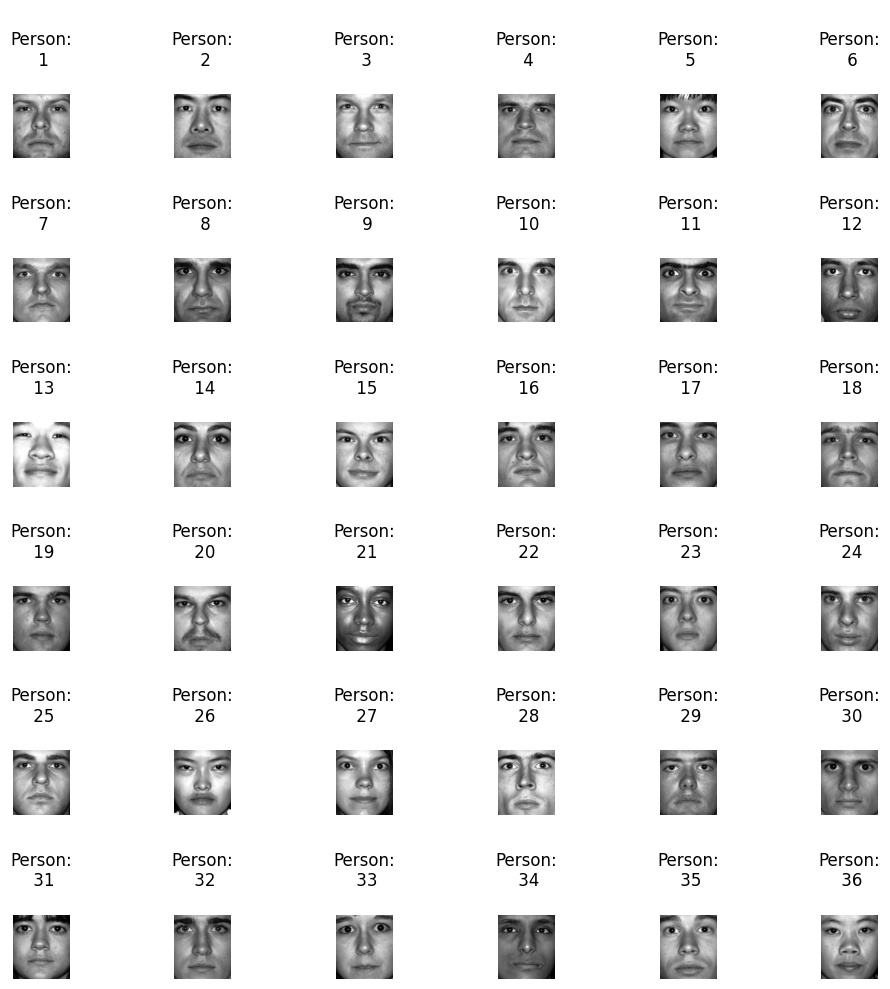

In [12]:
# Creating an array containing indexes of each new person image in our matrix
new_person = [0, 64, 126, 190, 254, 316, 380, 444, 508, 572, 636, 696, 755, 815, 878,
           940, 1003, 1066, 1130, 1194, 1258, 1322, 1386, 1450, 1514, 1578,
           1642, 1706, 1770, 1834, 1898, 1962, 2026, 2090, 2154, 2218]

plt.figure(figsize=(10,10))

for im in range(36):
  face_image = provided_faces[:,new_person[im]]
  face_image_reshaped = face_image.reshape(m,n) #flipped face
  face = np.transpose(face_image_reshaped)

  plt.subplot(6, 6, im+1)
  plt.title(f"\nPerson:\n {im+1}\n")
  plt.imshow(face, cmap="Greys_r")
  plt.axis('off')
plt.tight_layout()
plt.show()

#### Displaying all 64 images for Person 1

<ipython-input-13-cadc4b4fb5e0>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8,8,i+1)


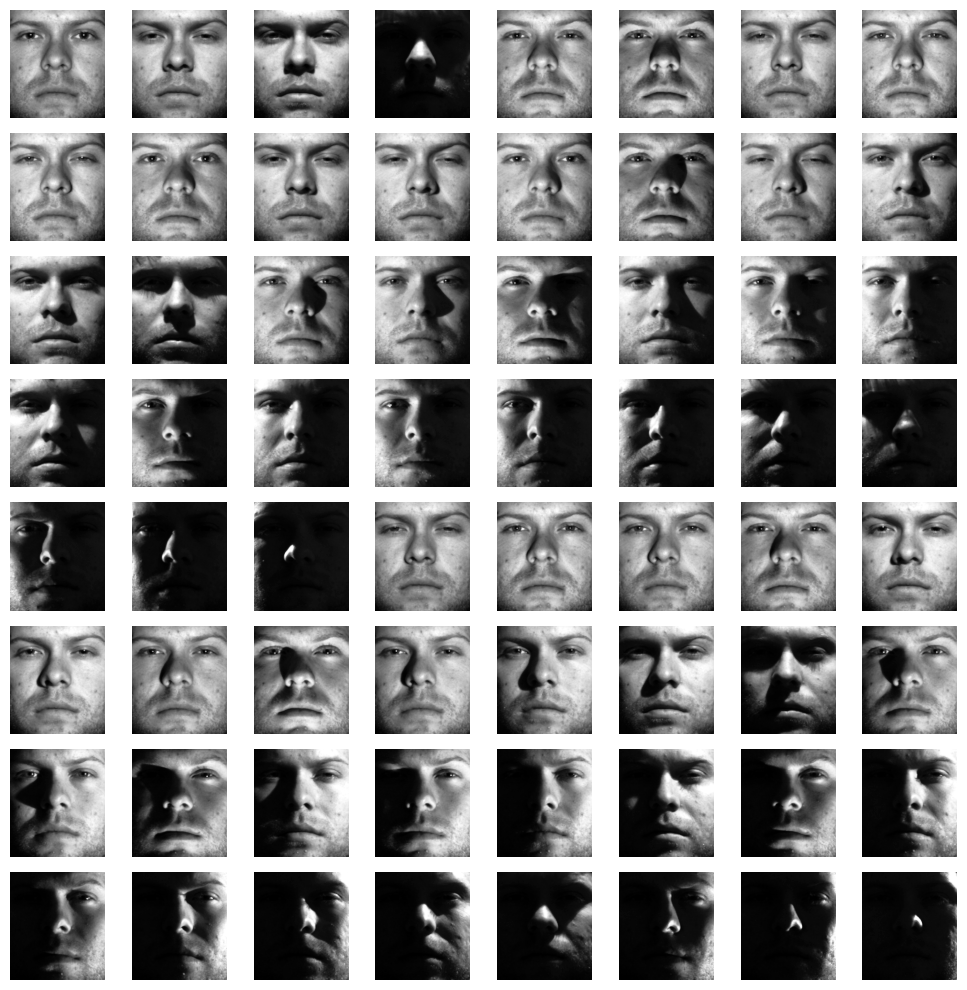

In [13]:
plt.figure(figsize=(10,10))
plt.title("Person 1 Images\n")

for i in range(64):
  face_im_1 = provided_faces[:,i]
  face_im_1_reshaped = face_im_1.reshape(m,n) #flipped face
  face_1 = np.transpose(face_im_1_reshaped)

  plt.subplot(8,8,i+1)
  plt.imshow(face_1, cmap="Greys_r")
  plt.axis('off')
plt.tight_layout()
plt.show()

#### Reading Grey Images of Person 2 (62 images provided for Person 2, so we'll have 2 emty spaces at the end when trying to display 8 images in each of the 8 rows)

<ipython-input-14-58b368cc3a2e>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8,8,i+1)


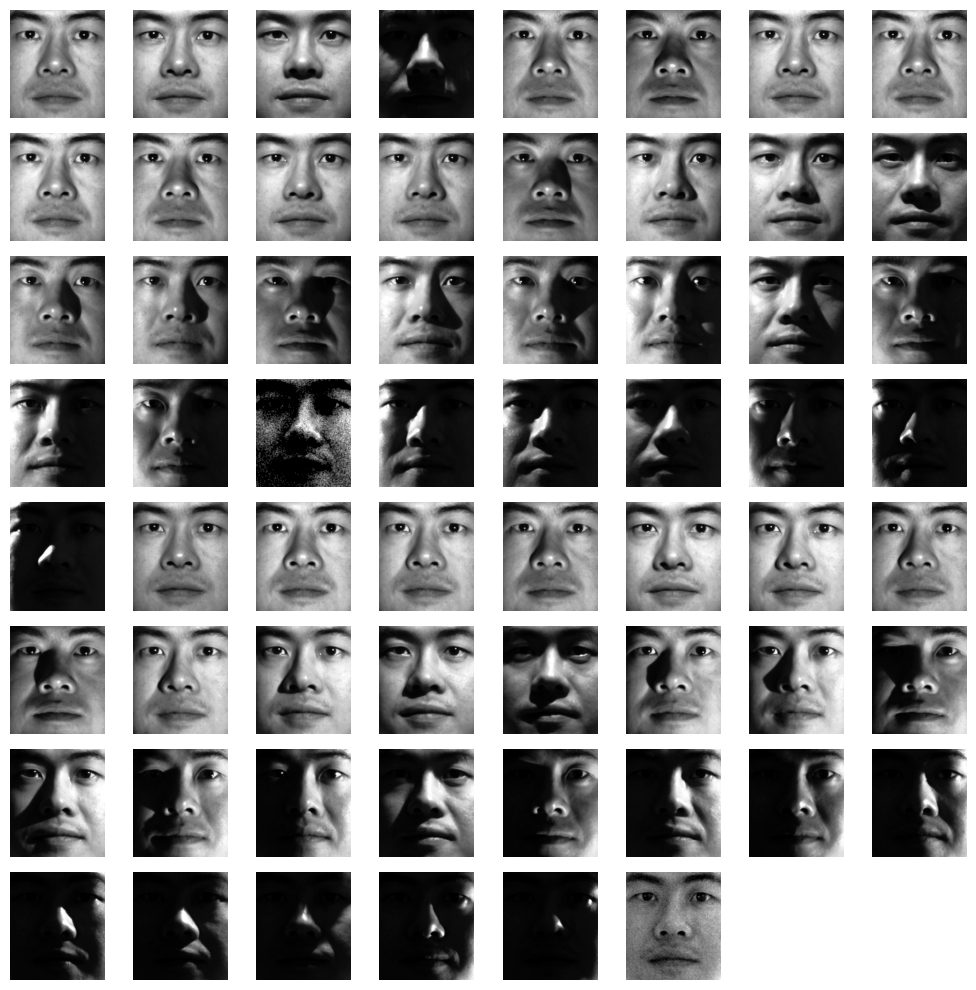

In [14]:
plt.figure(figsize=(10,10))
plt.title("Person 1 Images\n")

for i in range(62):
  face_im_1 = provided_faces[:,i+64]
  face_im_1_reshaped = face_im_1.reshape(m,n) #flipped face
  face_1 = np.transpose(face_im_1_reshaped)

  plt.subplot(8,8,i+1)
  plt.imshow(face_1, cmap="Greys_r")
  plt.axis('off')
plt.tight_layout()
plt.show()

# <font color="green"><b>Part 2</b></font>


#### Loading all faces with various lighting conditions from Person 1 to Person 36:

We have a total of 38 faces, each person represented by a different number of columns (indicating a varying number of images for each person).

We aim to create a data matrix containing pictures of the first 36 people, excluding the images of the last two individuals:

The total number of images is 2,410 (equal to the number of columns). According to the "nfaces" vector, the last two people have 64 images each.

Therefore, to accomplish this task, we need 2,282 columns, calculated as 2410 - 64 - 64.

In [15]:
data_matrix = provided_faces[:, 0:2282]

In [16]:
data_matrix.shape

(32256, 2282)

In [17]:
# Printing a small sample to compare later to ensure that subtraction was performed

data_matrix[0:5,0:5]

array([[80., 94., 59., 16., 69.],
       [81., 87., 67., 14., 67.],
       [80., 88., 66., 14., 67.],
       [79., 87., 74., 15., 69.],
       [80., 88., 75., 15., 67.]])

#### Calculating the Average Face Picture

In [18]:
# Averaging each feature/pixel over all pictures

average_value = np.empty((32256,))
for row in range(32256):
  average_value[row] = np.mean(data_matrix[row,:])


In [19]:
average_value.shape

(32256,)

#### Subtracting the Average we got from all the pictures and storing in matrix X

In [20]:
matrix_x = np.empty((32256,2282))

for row in range(32256):
  matrix_x[row,:] = data_matrix[row,:] - average_value[row]


In [21]:
# Printing a small sample to compare with values we had earlier

matrix_x[0:5,0:5]

array([[ 18.54776512,  32.54776512,  -2.45223488, -45.45223488,
          7.54776512],
       [ 18.98860649,  24.98860649,   4.98860649, -48.01139351,
          4.98860649],
       [ 17.73970202,  25.73970202,   3.73970202, -48.26029798,
          4.73970202],
       [ 16.68448729,  24.68448729,  11.68448729, -47.31551271,
          6.68448729],
       [ 17.71165644,  25.71165644,  12.71165644, -47.28834356,
          4.71165644]])

### Displaying our Average Face We just Calculated

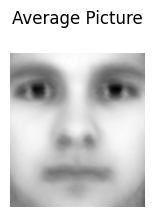

In [22]:
plt.figure(figsize=(2,2))
plt.title("Average Picture\n")

face_average = average_value
face_average_reshaped = face_average.reshape(m,n) #flipped face
face_avg = np.transpose(face_average_reshaped)


plt.imshow(face_avg, cmap="Greys_r")
plt.axis('off')

plt.show()

In [23]:
matrix_x.shape

(32256, 2282)

# <font color="green"><b>Part 3</b></font>

#### Calculating all Singular Values and Singular Vectors of matrix_x using built-in SVD function

We're using Economy SVD and not the Full SVD here

In [24]:
U,S,V = linalg.svd(matrix_x, full_matrices=False)

In [25]:
U.shape

(32256, 2282)

In [26]:
S.shape

(2282,)

In [27]:
V.shape

(2282, 2282)


#### Working with our extracted "u" vectors

*    Reshaping our U vectors to 2-D pictures of size 192 x 168 that will represent our eigen faces.
*    Plotting first 54 of these eigen faces.



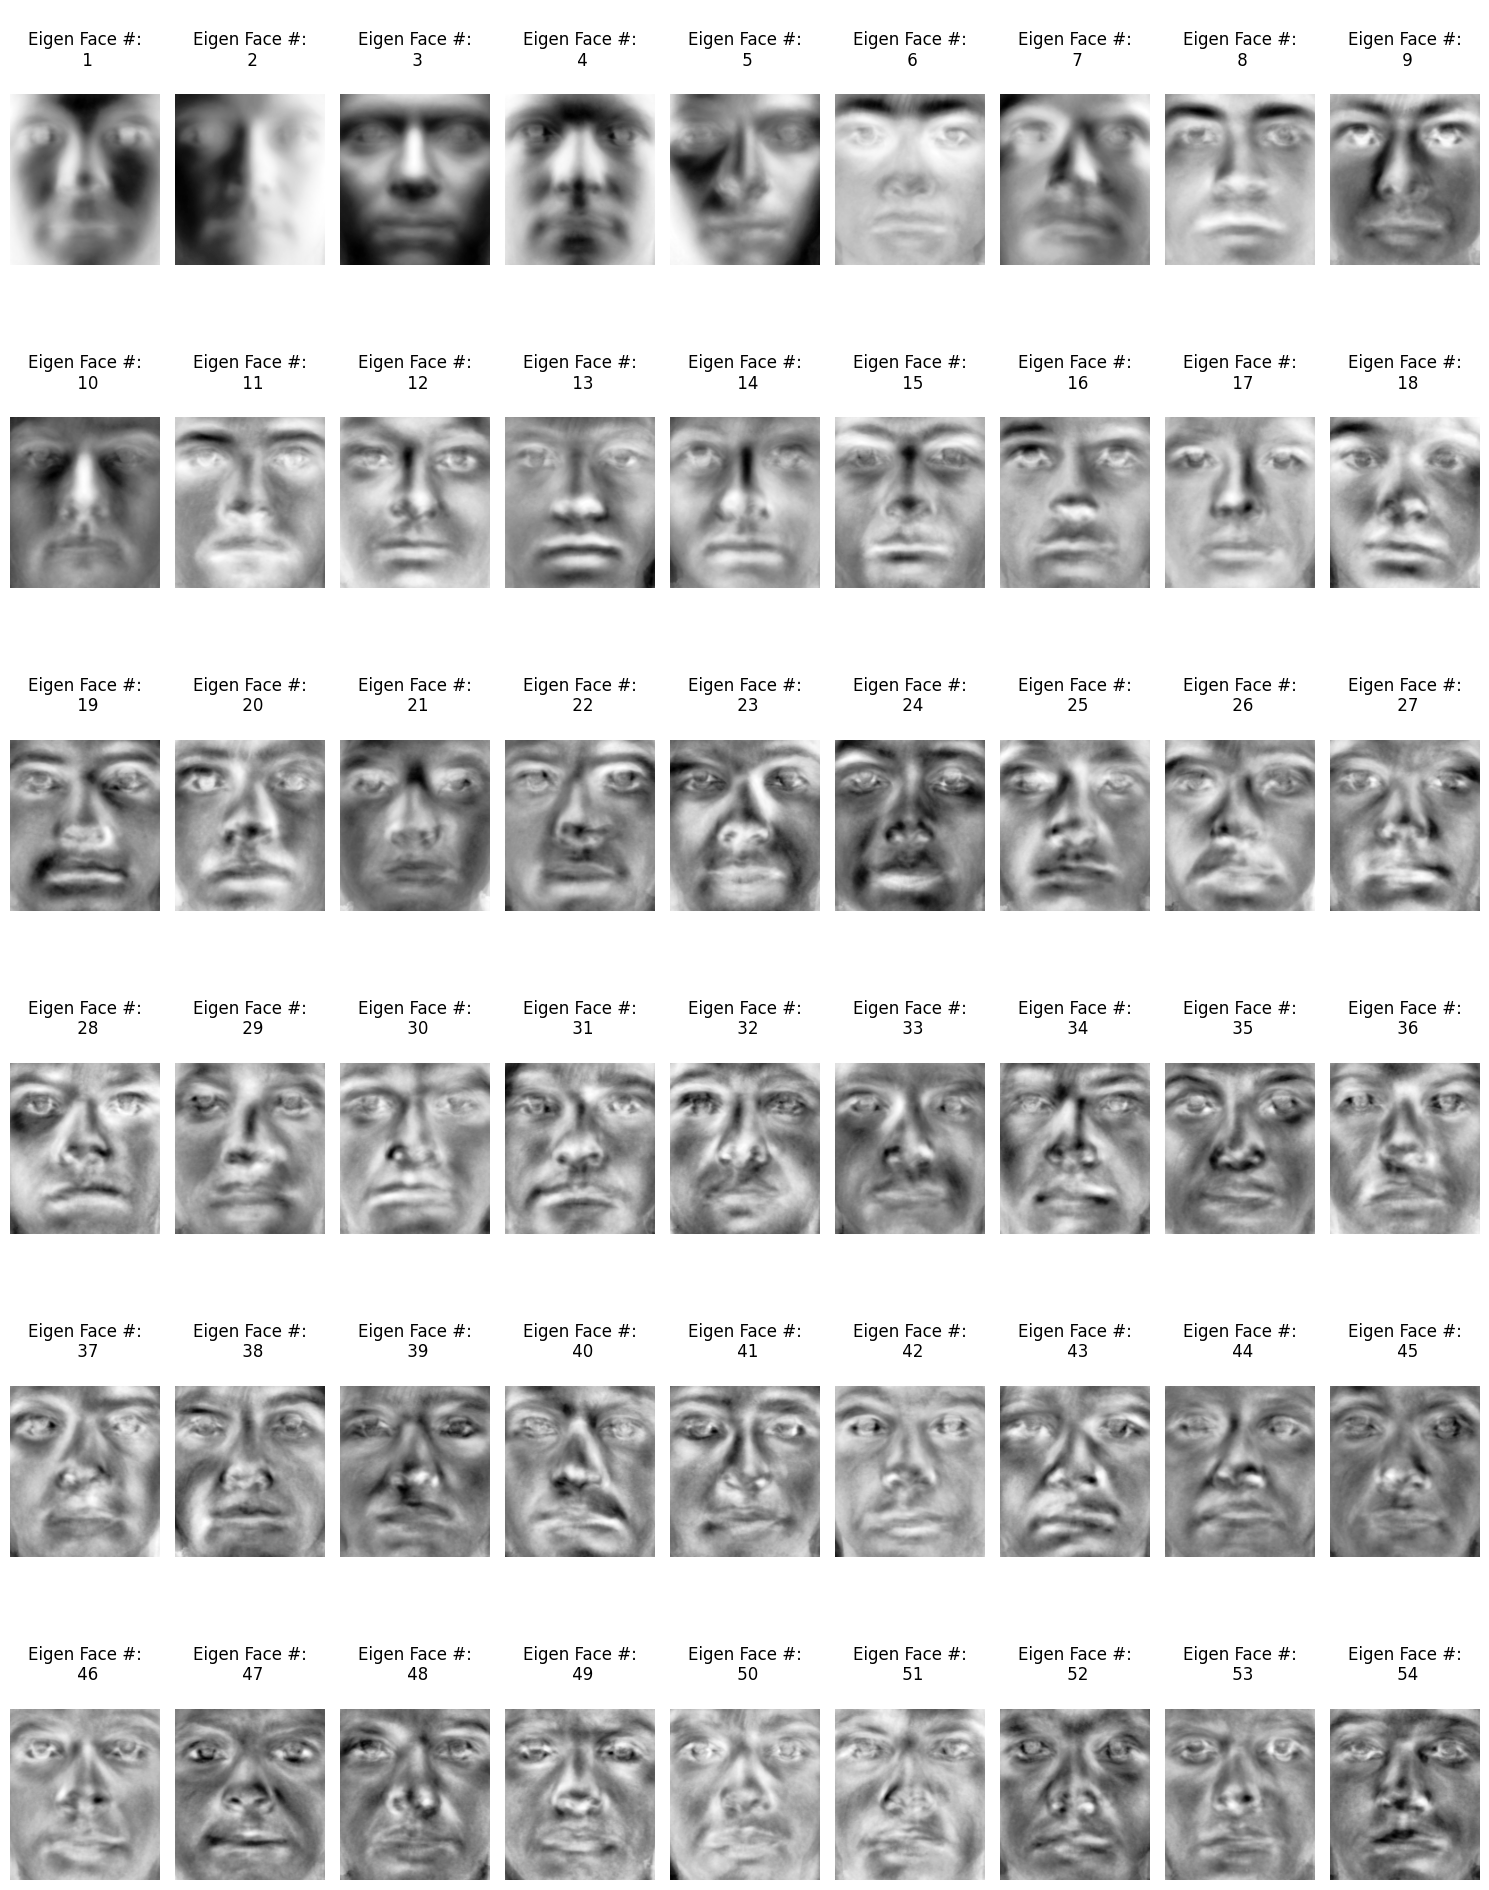

In [28]:
u_images = np.empty((192, 168, 2282))

for u_vector in range(2282):
  u_pixels = U[:, u_vector]
  u_pixels_reshaped = u_pixels.reshape(m,n) #flipped face
  eigen_face = np.transpose(u_pixels_reshaped)
  u_images[:,:,u_vector] = eigen_face

plt.figure(figsize=(15,20))

for eig_face in range(54):
  plt.subplot(6, 9, eig_face+1)
  plt.title(f"\nEigen Face #:\n {eig_face+1}\n")
  plt.imshow(u_images[:,:,eig_face], cmap="Greys_r")
  plt.axis('off')
plt.tight_layout()

plt.show()


In [29]:
u_images.shape

(192, 168, 2282)

#### Computing the Inner Product of the $1^{st}$ and $5^{th}$ Eigen Faces

In [30]:
U.shape

(32256, 2282)

In [31]:
# Inner Product between Face 1 and Face 5:

face_1_u = U[:,0]
face_5_u = U[:,4]
inner_1_5 = np.inner(face_1_u, face_5_u)
print(inner_1_5)


1.3877787807814457e-17


In [32]:
np.round(inner_1_5)

0.0

#### We calculated the inner product between Face 1 and Face 5:
#### The result is 1.3877787807814457e-17, which is very close to 0 (rounding it gives us 0).
#### Since the inner product is 0, it means they are orthogonal to each other.


#### Now Calculating the Inner Product between Eigen Face 10 and Eigen Face 15

In [33]:
# Inner Product between Face 10 and Face 15:

face_10_u = U[:,9]
face_15_u = U[:,14]
inner_10_15 = np.inner(face_10_u, face_15_u)
print(inner_10_15)

7.806255641895632e-18


In [34]:
np.round(inner_1_5)

0.0

#### We calculated the inner product between Face 10 and Face 15:

#### The result is 7.806255641895632e-18, which is very close to 0 (rounding it gives us 0.0).
#### Since the inner product is 0, it means they are orthogonal to each other.
#### All our eigenfaces (column vectors in the U matrix) are vectors of length 1 and are orthogonal to each other.

# <font color="green"><b>Part 4</b></font>

#### Decomposing the First Picture of Person 37 (was excluded in the beginning)

#### First, I will display the first image of Person 37 from the original file we had to see how it is supposed to look. We have the last two people with 64 pictures each, and a total of 2410 pictures, which means Person 37's first picture should be in position/column 2,282.

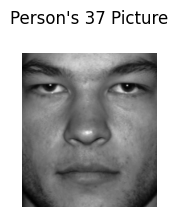

In [35]:
plt.figure(figsize=(2,2))
plt.title("Person's 37 Picture\n")


face_im_37 = provided_faces[:, 2282]
face_im_37_reshaped = face_im_37.reshape(m,n) #flipped face
face_37 = np.transpose(face_im_37_reshaped)

plt.imshow(face_37, cmap="Greys_r")
plt.axis('off')
plt.show()

#### Approximation of vector V

*   Approximating vector V using formula: $V ≈ ∑_{i=1}^r𝛂_iU_i$ where $𝛂_i = (U_i)^TV$

*   Plotting the approximation of vector V as a 2-D picture for $r = 5, 10, 200$, and $800$

  (Maximum possible value of $r$ is 2282, which is equal to the number of eigen
  faces (eigen vectors) we received after performing the economy SVD).


*   Here we assume that vector V is the first picture of person 37






## <font color="dodgerblue"><b>$r = 5$</b></font>


In [36]:
# We assume that vector V is the first picture of person 37
V_37 = provided_faces[:, 2282]

# our r = 5 => taking only this small part of the U matrix
U_r_5 = U[:,0:5]
U_r_5_transpose = np.transpose(U_r_5)
alpha_r_5 = np.matmul(U_r_5_transpose, V_37)

V_37_approximation = np.matmul(U_r_5, alpha_r_5)


#### Plotting r = 5 Approximation for the First Picture of Person 37

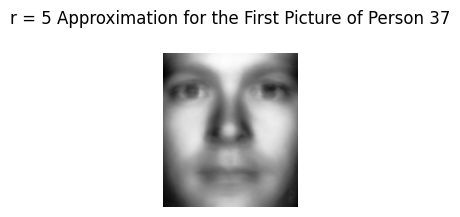

In [37]:
plt.figure(figsize=(2,2))
plt.title("r = 5 Approximation for the First Picture of Person 37\n")


V_37_r_5 = V_37_approximation
V_37_r_5_reshaped = V_37_r_5.reshape(m,n) #flipped face
V_37_r_5_approx = np.transpose(V_37_r_5_reshaped)

plt.imshow(V_37_r_5_approx, cmap="Greys_r")
plt.axis('off')
plt.show()

#### Repeating the Same Process for Other $r$'s

## <font color="dodgerblue"><b>$r = 10$</b></font>

In [38]:
# we assume that vector V is the first picture of person 37
V_37 = provided_faces[:, 2282]

# our r = 10 => taking only this small part of the U matrix
U_r_10 = U[:,0:10]
U_r_10_transpose = np.transpose(U_r_10)
alpha_r_10 = np.matmul(U_r_10_transpose, V_37)

V_37_approximation = np.matmul(U_r_10, alpha_r_10)

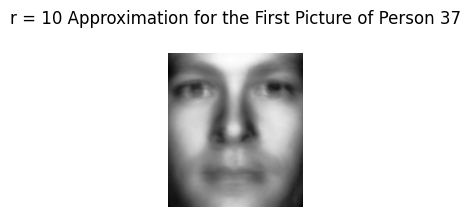

In [39]:
plt.figure(figsize=(2,2))
plt.title("r = 10 Approximation for the First Picture of Person 37\n")


V_37_r_10 = V_37_approximation
V_37_r_10_reshaped = V_37_r_10.reshape(m,n) #flipped face
V_37_r_10_approx = np.transpose(V_37_r_10_reshaped)

plt.imshow(V_37_r_10_approx, cmap="Greys_r")
plt.axis('off')
plt.show()

## <font color="dodgerblue"><b>$r = 200$</b></font>

In [40]:
# we assume that vector V is the first picture of person 37
V_37 = provided_faces[:, 2282]

# our r = 200 => taking only this small part of the U matrix
U_r_200 = U[:,0:200]
U_r_200_transpose = np.transpose(U_r_200)
alpha_r_200 = np.matmul(U_r_200_transpose, V_37)

V_37_approximation = np.matmul(U_r_200, alpha_r_200)

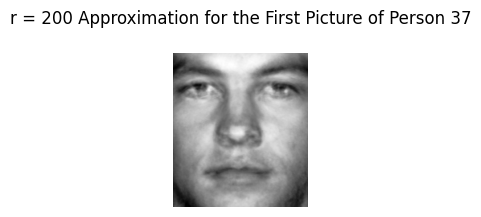

In [41]:
plt.figure(figsize=(2,2))
plt.title("r = 200 Approximation for the First Picture of Person 37\n")


V_37_r_200 = V_37_approximation
V_37_r_200_reshaped = V_37_r_200.reshape(m,n) #flipped face
V_37_r_200_approx = np.transpose(V_37_r_200_reshaped)

plt.imshow(V_37_r_200_approx, cmap="Greys_r")
plt.axis('off')
plt.show()

## <font color="dodgerblue"><b>$r = 800$</b></font>

In [42]:
# we assume that vector V is the first picture of person 37
V_37 = provided_faces[:, 2282]

# our r = 800 => taking only this small part of the U matrix
U_r_800 = U[:,0:800]
U_r_800_transpose = np.transpose(U_r_800)
alpha_r_800 = np.matmul(U_r_800_transpose, V_37)

V_37_approximation = np.matmul(U_r_800, alpha_r_800)

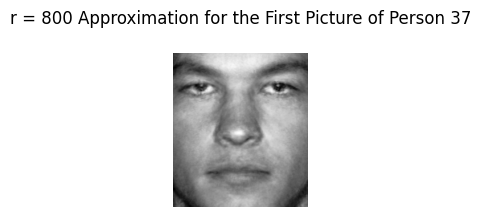

In [43]:
plt.figure(figsize=(2,2))
plt.title("r = 800 Approximation for the First Picture of Person 37\n")


V_37_r_800 = V_37_approximation
V_37_r_800_reshaped = V_37_r_800.reshape(m,n) #flipped face
V_37_r_800_approx = np.transpose(V_37_r_800_reshaped)

plt.imshow(V_37_r_800_approx, cmap="Greys_r")
plt.axis('off')
plt.show()

#### If we examine the case where r = 200, the image begins to resemble Person 37 and acquire their features, yet it's still insufficient to conclusively identify it as Person 37. Therefore, with r < 200, it's still not possible to say for sure that the image shows Person 37.

#### To show that this is True, we can try to visualize it when r=100:

In [44]:
V_37 = provided_faces[:, 2282]

# If our r = 100 => taking only this small part of the U matrix
U_r_100 = U[:,0:100]
U_r_100_transpose = np.transpose(U_r_100)
alpha_r_100 = np.matmul(U_r_100_transpose, V_37)

V_37_approximation = np.matmul(U_r_100, alpha_r_100)

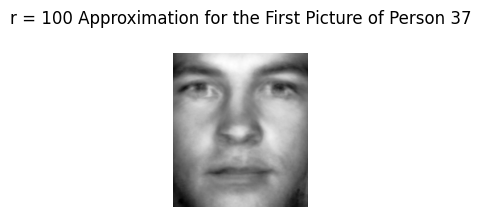

In [45]:
plt.figure(figsize=(2,2))
plt.title("r = 100 Approximation for the First Picture of Person 37\n")


V_37_r_100 = V_37_approximation
V_37_r_100_reshaped = V_37_r_100.reshape(m,n) #flipped face
V_37_r_100_approx = np.transpose(V_37_r_100_reshaped)

plt.imshow(V_37_r_100_approx, cmap="Greys_r")
plt.axis('off')
plt.show()

# <font color="green"><b>Part 5</b></font>

### Plotting Singular Values



*   Horizontal axis: index
*   Vertical axis: log of value of the singular value



In [46]:
S.shape

(2282,)

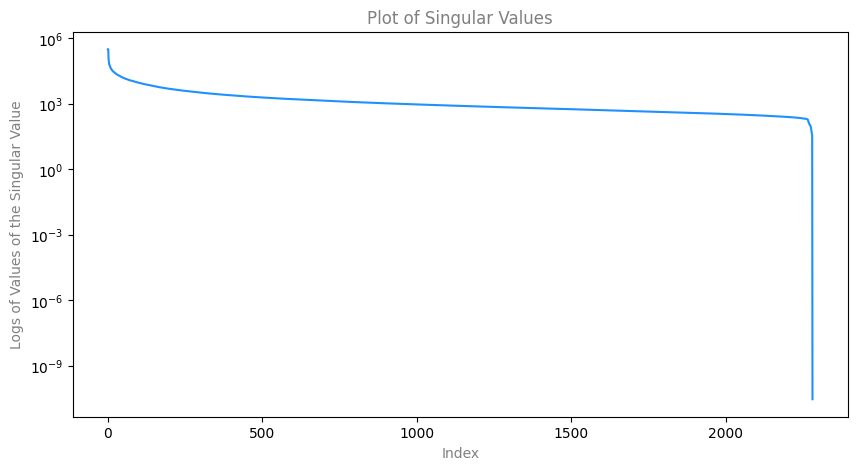

In [47]:
index_values = np.arange(2282)

plt.figure(figsize=(10,5))

plt.semilogy(index_values, S, color = "dodgerblue")


plt.title('Plot of Singular Values', color = "gray")
plt.xlabel('Index', color = "gray")
plt.ylabel('Logs of Values of the Singular Value', color = "gray")
plt.show()


### **Looking for a good point for truncation:**

#### Our breaking point is between $10^3$ and $10^6$, but closer to $10^3$.

#### It will give us our optimal $r$'s somewhere between 0 and 500, but closer to 500.

#### As we've seen earlier, r = 200 didn't provide a good enough approximation of a face. So, we can assume that the good point for truncation would be around 300-400.

# <font color="green"><b>Part 6</b></font>

In [48]:
vectors_per_face

array([[64., 62., 64., 64., 62., 64., 64., 64., 64., 64., 60., 59., 60.,
        63., 62., 63., 63., 64., 64., 64., 64., 64., 64., 64., 64., 64.,
        64., 64., 64., 64., 64., 64., 64., 64., 64., 64., 64., 64.]])

#### Getting all 62 different pictures of Person 2:

<ipython-input-49-1e3db6e0abf1>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8,8,i+1)


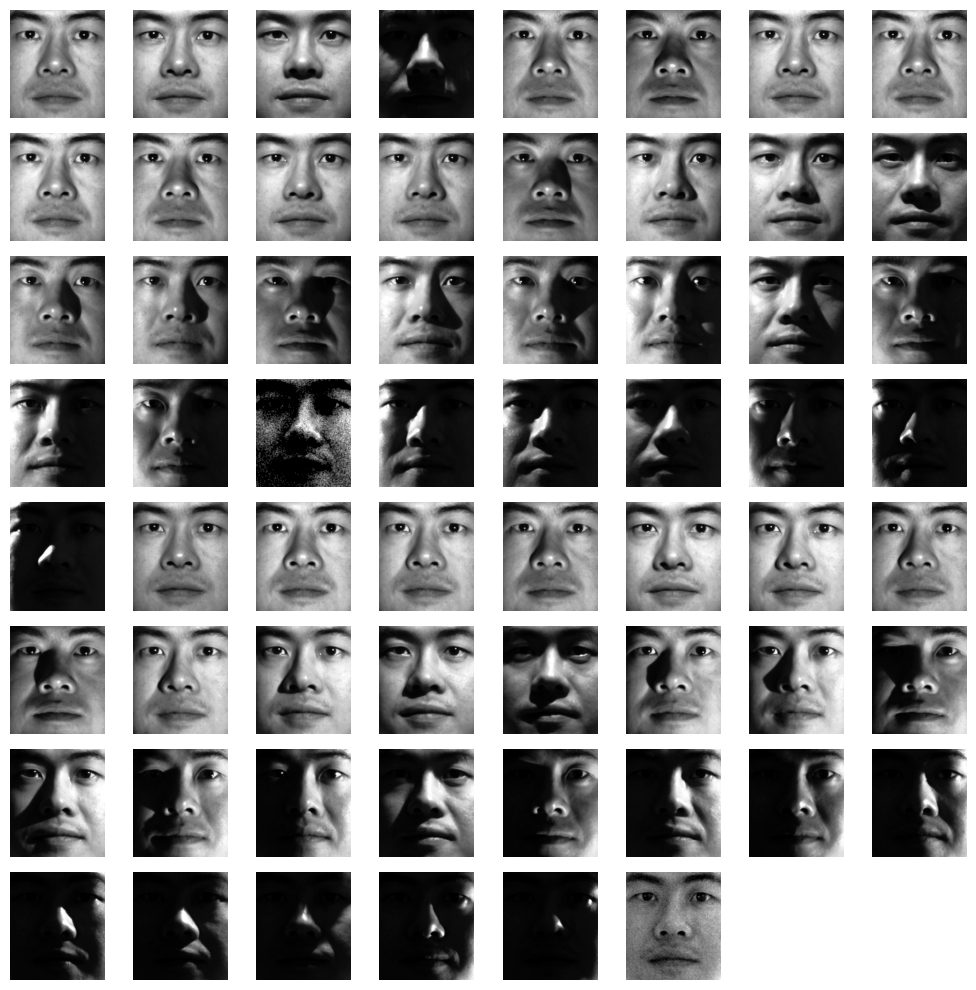

In [49]:
plt.figure(figsize=(10,10))
plt.title("Person 2 Images\n")

for i in range(62):
  face_im_1 = provided_faces[:,i+64]
  face_im_1_reshaped = face_im_1.reshape(m,n) #flipped face
  face_1 = np.transpose(face_im_1_reshaped)

  plt.subplot(8,8,i+1)
  plt.imshow(face_1, cmap="Greys_r")
  plt.axis('off')
plt.tight_layout()
plt.show()

#### Calculating how much of Eigen Face number 5 we have in each picture of Person 2



*   Ex: $V_1$ represents the first picture of Person 2 ($V_2$: the second, etc.)

*   U(5) is the $5^{th}$ eigen face


*   To calculate $𝛂$ amount of $5^{th}$ eigen face in the first picture of Person 2, we use the following formula: $𝛂 = (V_1)^TU(5)$

*   Finally, calculating $𝛂$ amount of eigen face 5 in all other pictures of Person 2





In [50]:
# Testing the first picture of Person 2:
V_1_transpose = np.transpose(provided_faces[:,64])
U_5 = U[:,4]
alpha_val_1 = np.matmul(V_1_transpose, U_5)
print(alpha_val_1)

-222.959696544047


In [51]:
# Calculating alpha value of eigen face 5 for each picture of Person 2:

V_person_2 = provided_faces[:, 64:126]
V_person_2_transposed = np.transpose(V_person_2)
U_5 = U[:, 4]
alpha_5_person_2 = np.matmul(V_person_2_transposed, U_5)
print(alpha_5_person_2)

[ -222.95969654  -313.27820387  -413.11495903  -740.78408059
  -320.91181912  -287.39639564  -461.37853083  -310.20910452
  -351.70438578    -7.78244134  -301.92790581  -184.78936192
   136.00448083  -339.57432815  -692.75517524  -704.55009761
   246.27551937   130.78003579   935.55035298  -562.68175337
  1036.18096738  1009.6343094  -1241.81440821  2069.90934216
    50.94470416  2229.891308      -7.84560183  1325.75223067
  -516.50494027 -1343.71090315  2483.57004613  1697.06859517
   377.99239447  -410.0615279   -538.05564718  -519.41013679
  -496.96684461  -327.55776796  -429.50032103  -507.03954222
  -526.51999496  -546.96266998  -469.93523195   -31.50537891
   305.20186072  -715.30945244  -487.05595428 -1338.40073969
   236.87351344 -1253.40354391  -608.64914372  1271.89830036
 -1982.80148858   399.66401401 -1853.66780941 -1342.85554731
  -186.25747937   506.17809362   254.98693059 -1699.9836689
  -470.03739189   -26.48073355]


#### Similarly, calculating $𝛂$ amount of eigen face 6 in every picture of Person 2:

In [52]:
# Calculating alpha value of eigen face 6 for each picture of Person 2:

V_person_2 = provided_faces[:, 64:126]
V_person_2_transposed = np.transpose(V_person_2)
U_6 = U[:, 5]
alpha_6_person_2 = np.matmul(V_person_2_transposed, U_6)
print(alpha_6_person_2)

[2116.62921071 2690.19303323 3237.80697466  371.90221509 1461.22670672
  701.06686416 2550.34012734 1847.11551108 2282.35847125 1509.38768636
 2615.13146208 2284.60982181  383.27747643 2309.84695515 2754.52350063
 2161.69357957  915.11368086 1198.64328002 -120.68851702 1683.65607559
  228.5011868   772.43129887 1611.4081215   -76.02809627  975.84178166
  401.3840805    39.95844755  337.99428938  362.11967011  372.17284705
  255.98867774  137.47856112 -117.99433249 2181.18705014 1927.52779915
 2183.96701104 1369.17083533 2931.13651623 2658.88501597 1708.77428603
  112.28905547 2065.45518467 2630.63935926 3197.38837986 2051.5039335
  619.92862479 1426.25471127 -710.32561073 2329.69237053  -52.9499527
  759.46849075 2292.84606798 -708.9467627  1416.17171089 -235.65358502
   47.51354002   79.96330196  376.055181    298.81911317 -425.65130447
   48.36904233  120.63587939]


### Plotting a 2-D Graph for Eigen Face 5 and Eigen Face 6



*   First, calculating $𝛂$'s for Person 7 needed for the graph

*   X-axis will represent $5^{th}$ eigen face, and Y-axis will represent $6^{th}$ eigen face


*   All pictures of Person 2 will be displayed in <font color="black"><b>black</b></font>, and all pictures of Person 7 will be shown in <font color="red"><b>red</b></font>.






#### Calculating $𝛂$'s of eigen faces 5 and 6 for Person 7 the same way we did before for Person 2

In [53]:
vectors_per_face

array([[64., 62., 64., 64., 62., 64., 64., 64., 64., 64., 60., 59., 60.,
        63., 62., 63., 63., 64., 64., 64., 64., 64., 64., 64., 64., 64.,
        64., 64., 64., 64., 64., 64., 64., 64., 64., 64., 64., 64.]])

##### Ranges for first 7 people:

1: 0-64

2: 64-126

3: 126-190

4: 190-254

5: 254-316

6: 316-380

7: 380-444

In [54]:
# Calculating alpha value of eigen face 5 for each picture of Person 7:

V_person_7 = provided_faces[:, 380:444]
V_person_7_transposed = np.transpose(V_person_7)
U_5 = U[:, 4]
alpha_5_person_7 = np.matmul(V_person_7_transposed, U_5)
print(alpha_5_person_7)

[  408.86963979   435.87774253   359.03594912    18.03002237
   477.47878803   552.98003664   582.11211259   755.7196973
   840.2797027    743.51862214   499.72958997   627.44658866
   802.01904935   997.23698603   612.07438472   209.9441508
  -478.71003784 -1032.06805592  1096.61537203   296.14499528
  1631.13450078  -720.70168109  1368.51785238   810.70886422
 -1745.46534194  2488.53882975  -314.06773045  2672.66118105
  2131.72786703   768.95375777  -683.40361151  -991.38967246
  3871.07818289  2569.75132173   586.3124515    397.95382732
   466.38465156   303.90354635   224.01767944   389.75388434
   207.10849833   120.06543966    95.41761124    46.94971467
   615.77968488  1094.09523006  1579.69771494   -99.75424127
   670.67269664  -989.9590471   1954.11662823  -485.70165744
   185.83596206  2849.95983011 -1595.41019645  1350.00239362
 -1795.31485149 -1486.00548084  -107.34108584  1113.95314119
   960.55100946 -3614.95572831 -2781.74810669  -249.27433295]


In [55]:
# Calculating alpha value of eigen face 6 for each picture of Person 7:

V_person_7 = provided_faces[:, 380:444]
V_person_7_transposed = np.transpose(V_person_7)
U_6 = U[:, 5]
alpha_6_person_7 = np.matmul(V_person_7_transposed, U_6)
print(alpha_6_person_7)

[-1540.00053144 -2157.4841439  -2778.13509086 -2152.1805954
 -1034.72143029  -626.2960897  -1947.57276586 -1288.789459
 -1678.23716597 -1041.37276269 -2189.38820322 -1793.0878179
 -1136.63627175  -554.07294815 -1177.29693132 -2017.77767889
 -2458.44120666 -2710.87368219 -1014.26107503 -1450.7105171
  -422.76781983 -2079.02035135  -826.44675624 -1325.20750104
 -1989.54879259  -158.95086118 -1374.45414876  -239.16392627
  -483.68860346  -823.59078999 -1166.18706225 -1707.23668284
   -78.78816649  -396.26426486 -1170.03845193 -1716.86367013
 -1465.50974191 -1663.53862274 -1059.2381909  -2367.95139647
 -1978.13906995 -1297.86414069  -729.22620622 -1527.61375831
 -1994.15640859 -2307.99555377 -2217.14156152 -1338.31356387
 -1730.78117533  -994.15384386 -1785.36090598 -1140.46320681
 -1193.38577932 -1355.81359376  -876.41622581 -1288.67713075
 -1062.35568042 -1399.45640604 -1271.78626162 -1040.86304413
 -1249.59306346 -1659.07624285 -1523.67610917  -578.75347523]


#### Plotting the Results

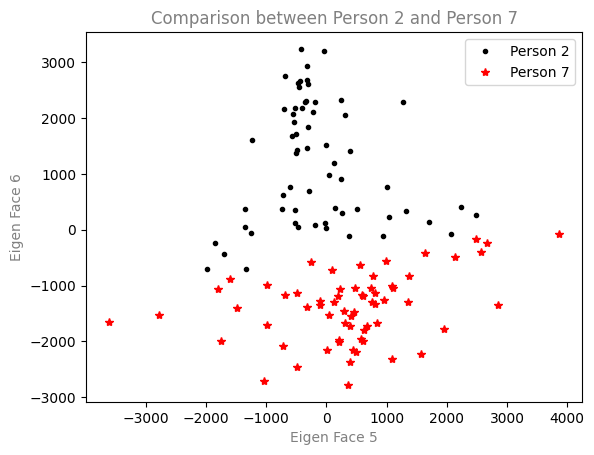

In [56]:
plt.plot(alpha_5_person_2, alpha_6_person_2, "k.", label="Person 2")
plt.plot(alpha_5_person_7, alpha_6_person_7, "r*", label="Person 7")
plt.title("Comparison between Person 2 and Person 7", color="grey")
plt.xlabel("Eigen Face 5", color="grey")
plt.ylabel("Eigen Face 6", color="grey")
plt.legend()
plt.show()

#### This graph would be great for implementing a good classification algorithm. As observed in the graph, there are two distinct groups of data that are separated and do not overlap (although there are a few points from both sets near the border, they should not pose a problem). Therefore, it would be straightforward to determine whether a face belongs to one group or the other.
